In [11]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [12]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [18]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("sentiment_data.csv")

comment = df['Comment'].astype(str).tolist()
sentiment = df['Sentiment'].tolist()

Saving sentiment_data.csv to sentiment_data (2).csv


In [19]:
training_comment = comment[0:training_size]
testing_comment = comment[training_size:]
training_sentiment = sentiment[0:training_size]
testing_sentiment = sentiment[training_size:]

In [20]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_comment)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_comment)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_comment)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [21]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_sentiment)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_sentiment)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
num_epochs = 30
# Use the numpy arrays training_labels and testing_labels for the labels
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 25s - 39ms/step - accuracy: 0.2600 - loss: -5.4141e+02 - val_accuracy: 0.3517 - val_loss: -8.5084e+02
Epoch 2/30
625/625 - 39s - 63ms/step - accuracy: 0.2603 - loss: -7.6842e+03 - val_accuracy: 0.3517 - val_loss: -6.2078e+03
Epoch 3/30
625/625 - 34s - 54ms/step - accuracy: 0.2603 - loss: -2.9970e+04 - val_accuracy: 0.3517 - val_loss: -1.8646e+04
Epoch 4/30
625/625 - 21s - 34ms/step - accuracy: 0.2603 - loss: -7.2379e+04 - val_accuracy: 0.3517 - val_loss: -3.9666e+04
Epoch 5/30
625/625 - 20s - 32ms/step - accuracy: 0.2603 - loss: -1.3774e+05 - val_accuracy: 0.3517 - val_loss: -7.0048e+04
Epoch 6/30
625/625 - 22s - 35ms/step - accuracy: 0.2603 - loss: -2.2783e+05 - val_accuracy: 0.3517 - val_loss: -1.1040e+05
Epoch 7/30
625/625 - 15s - 24ms/step - accuracy: 0.2603 - loss: -3.4458e+05 - val_accuracy: 0.3517 - val_loss: -1.6169e+05
Epoch 8/30
625/625 - 21s - 34ms/step - accuracy: 0.2603 - loss: -4.8971e+05 - val_accuracy: 0.3517 - val_loss: -2.2436e+05
Epoch 9/30
625/6

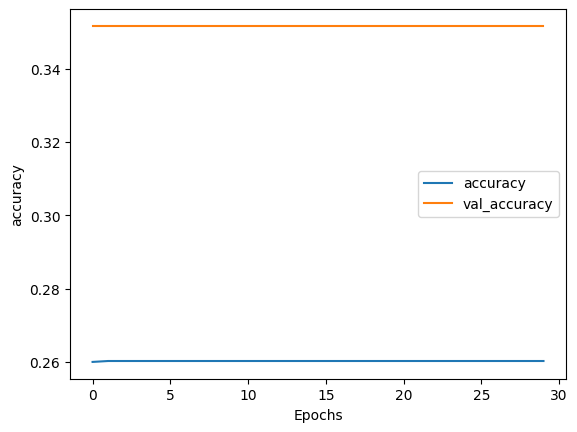

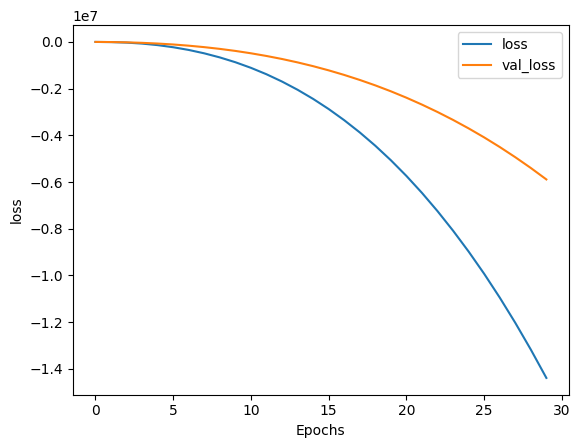

In [26]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [27]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_comment[2])
print(sentiment[2])

lets forget apple pay required brand new iphone order use significant portion apples user base wasnt able use even wanted <OOV> iphone incorporated technology older iphones replaced number people could use technology increased ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
forever acknowledge channel help lessons ideas explanations quite helpful youll sit comfort monitor account growth
2


In [28]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [29]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [30]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night", "I hate your face"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1.]
 [1.]
 [1.]]
